In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score

In [ ]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Diabetes_Preprocessed_Before_Feature_Selection.csv')
df.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,glyburide-metformin,diabetesMed,readmitted,preceding_year_visits,number_changes,insulin_treatment
0,Caucasian,0,5,Not Available,Referral,1,41,0,1,Diabetes,Not Required,Not Required,1,None,None,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,no_med
1,Caucasian,0,15,Discharged to home,Emergency,3,59,0,18,"Endocrine, Nutritional, Metabolic, Immunity",Diabetes,"Endocrine, Nutritional, Metabolic, Immunity",9,None,None,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,1,0,0,1,insulin_only
2,AfricanAmerican,0,25,Discharged to home,Emergency,2,11,5,13,"Pregnancy, Childbirth",Diabetes,External causes of injury,6,None,None,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,1,0,3,0,other_meds
3,Caucasian,1,35,Discharged to home,Emergency,2,44,1,16,Infectious and Parasitic,Diabetes,Circulatory,7,None,None,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,1,0,0,1,insulin_only
4,Caucasian,1,45,Discharged to home,Emergency,1,51,0,8,Neoplasms,Neoplasms,Diabetes,5,None,None,-2,-2,-2,-2,0,-2,-2,-2,0,-2,1,0,0,0,insulin_combo


In [ ]:
df.shape

(97070, 30)

In [ ]:
X = df.drop('readmitted', 1)
y = df['readmitted']
X_dum = pd.get_dummies(X, drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size = 0.3, stratify = y, random_state = 0)

In [ ]:
num_cols = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
            'number_diagnoses', 'preceding_year_visits', 'number_changes']

In [ ]:
X_train.loc[:, num_cols].skew()

age                     -0.621101
time_in_hospital         1.145219
num_lab_procedures      -0.242766
num_procedures           1.316956
num_medications          1.336549
number_diagnoses        -0.890263
preceding_year_visits    5.562799
number_changes           1.428450
dtype: float64

In [ ]:
X_train.loc[:, num_cols].isna().sum()

age                      0
time_in_hospital         0
num_lab_procedures       0
num_procedures           0
num_medications          0
number_diagnoses         0
preceding_year_visits    0
number_changes           0
dtype: int64

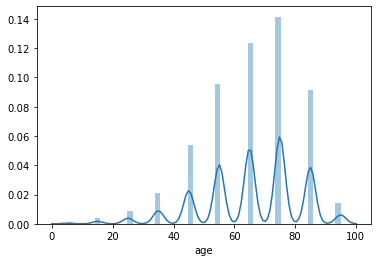

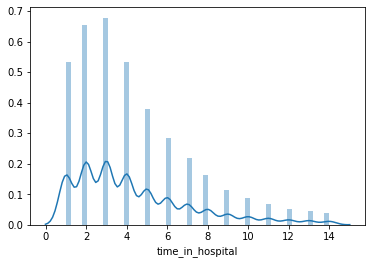

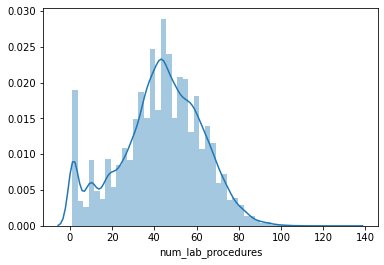

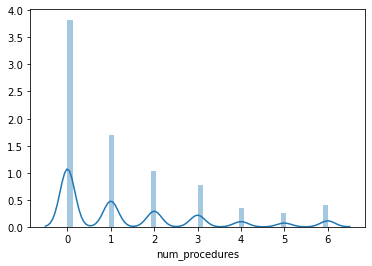

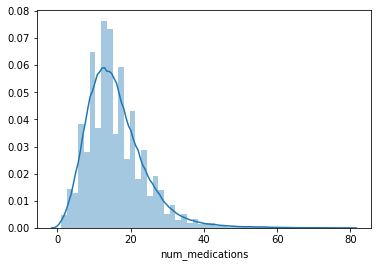

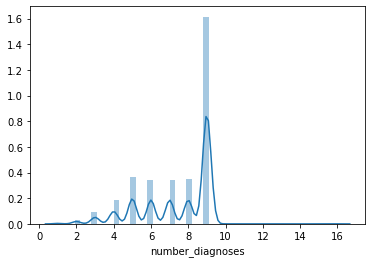

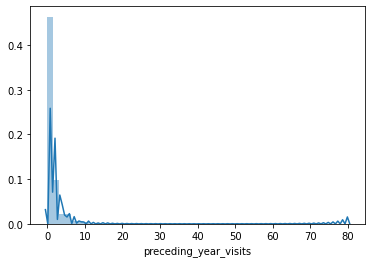

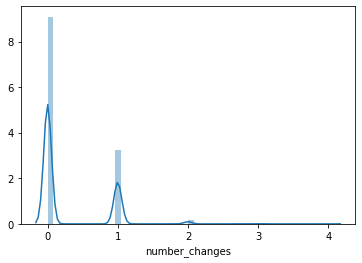

In [ ]:
for i in num_cols:
    sns.distplot(X_train[i])
    plt.show()

In [ ]:
num_cols = ['time_in_hospital', 'num_procedures', 'num_medications', 'preceding_year_visits', 'number_changes']

In [ ]:
X_train[num_cols] = np.sqrt(X_train[num_cols])

In [ ]:
X_train.loc[:, num_cols].isna().sum()

time_in_hospital         0
num_procedures           0
num_medications          0
preceding_year_visits    0
number_changes           0
dtype: int64

In [ ]:
X_train.loc[:, num_cols].skew()

time_in_hospital         0.479532
num_procedures           0.405080
num_medications          0.348020
preceding_year_visits    1.153480
number_changes           1.075283
dtype: float64

In [ ]:
X_test[num_cols] = np.sqrt(X_test[num_cols])

In [ ]:
X_test.loc[:, num_cols].isna().sum()

time_in_hospital         0
num_procedures           0
num_medications          0
preceding_year_visits    0
number_changes           0
dtype: int64

In [ ]:
X_test.loc[:, num_cols].skew()

time_in_hospital         0.470813
num_procedures           0.408212
num_medications          0.346887
preceding_year_visits    1.188993
number_changes           1.081575
dtype: float64

In [ ]:
mm = MinMaxScaler()
X_train = pd.DataFrame(mm.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(mm.transform(X_test), columns = X_test.columns)
X_train.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,glyburide-metformin,diabetesMed,preceding_year_visits,number_changes,race_Asian,race_Caucasian,race_Hispanic,race_Other,discharge_disposition_id_Discharged to home with home health service,discharge_disposition_id_Left AMA,discharge_disposition_id_Not Available,discharge_disposition_id_Still patient/referred to this institution,discharge_disposition_id_Transferred to another medical facility,admission_source_id_Not Available,admission_source_id_Referral,admission_source_id_Transferred from another health care facility,diag_1_Circulatory,diag_1_Congenital Anomalies,diag_1_Diabetes,diag_1_Digestive,"diag_1_Endocrine, Nutritional, Metabolic, Immunity",diag_1_External causes of injury,diag_1_Genitourinary,diag_1_Infectious and Parasitic,diag_1_Injury and Poisoning,diag_1_Mental Disorders,diag_1_Musculoskeletal System and Connective Tissue,diag_1_Neoplasms,diag_1_Nervous,diag_1_Other Symptoms,"diag_1_Pregnancy, Childbirth",diag_1_Respiratory,diag_1_Sense Organs,diag_1_Skin and Subcutaneous Tissue,diag_2_Circulatory,diag_2_Congenital Anomalies,diag_2_Diabetes,diag_2_Digestive,"diag_2_Endocrine, Nutritional, Metabolic, Immunity",diag_2_External causes of injury,diag_2_Genitourinary,diag_2_Infectious and Parasitic,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Musculoskeletal System and Connective Tissue,diag_2_Neoplasms,diag_2_Nervous,diag_2_Not Required,diag_2_Other Symptoms,"diag_2_Pregnancy, Childbirth",diag_2_Respiratory,diag_2_Sense Organs,diag_2_Skin and Subcutaneous Tissue,diag_3_Circulatory,diag_3_Congenital Anomalies,diag_3_Diabetes,diag_3_Digestive,"diag_3_Endocrine, Nutritional, Metabolic, Immunity",diag_3_External causes of injury,diag_3_Genitourinary,diag_3_Infectious and Parasitic,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Musculoskeletal System and Connective Tissue,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Required,diag_3_Other Symptoms,"diag_3_Pregnancy, Childbirth",diag_3_Respiratory,diag_3_Sense Organs,diag_3_Skin and Subcutaneous Tissue,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
0,0.0,0.444444,0.528691,0.396947,0.408248,0.555915,0.466667,0.333333,0.0,0.0,0.666667,0.000000,0.0,0.0,0.0,0.333333,0.0,1.0,0.158114,0.707107,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.888889,0.151081,0.320611,0.000000,0.494280,0.400000,0.000000,0.0,0.0,0.000000,0.666667,0.0,0.0,0.0,0.666667,0.0,1.0,0.193649,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.666667,0.000000,0.000000,0.408248,0.395921,0.133333,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.111803,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.888889,0.450847,0.312977,0.000000,0.440169,0.533333,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.666667,0.0,1.0,0.000000,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### Different Paramaters Tuning

#### l1 penalty with different solvers

In [ ]:
for i in ['liblinear', 'saga']:
    print(i)
    lr = LogisticRegression(penalty = 'l1', solver = i)
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    proba = lr.predict_proba(X_test)[:, 1]
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print(roc_auc_score(y_test, proba))
    print()

liblinear
[[25776     9]
 [ 3335     1]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     25785
           1       0.10      0.00      0.00      3336

    accuracy                           0.89     29121
   macro avg       0.49      0.50      0.47     29121
weighted avg       0.80      0.89      0.83     29121

0.6549708749579743

saga
[[25776     9]
 [ 3335     1]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     25785
           1       0.10      0.00      0.00      3336

    accuracy                           0.89     29121
   macro avg       0.49      0.50      0.47     29121
weighted avg       0.80      0.89      0.83     29121

0.6551199587159824



##### With class weight

In [ ]:
for i in ['liblinear', 'saga']:
    print(i)
    lr = LogisticRegression(penalty = 'l1', solver = i, class_weight = 'balanced')
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    proba = lr.predict_proba(X_test)[:, 1]
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print(roc_auc_score(y_test, proba))
    print()

liblinear
[[16322  9463]
 [ 1349  1987]]
              precision    recall  f1-score   support

           0       0.92      0.63      0.75     25785
           1       0.17      0.60      0.27      3336

    accuracy                           0.63     29121
   macro avg       0.55      0.61      0.51     29121
weighted avg       0.84      0.63      0.70     29121

0.6565092254294296

saga
[[16313  9472]
 [ 1349  1987]]
              precision    recall  f1-score   support

           0       0.92      0.63      0.75     25785
           1       0.17      0.60      0.27      3336

    accuracy                           0.63     29121
   macro avg       0.55      0.61      0.51     29121
weighted avg       0.84      0.63      0.70     29121

0.6565317902745866



#### l2 penalty with different solvers with class weight

In [ ]:
for i in ['liblinear', 'saga', 'newton-cg', 'sag', 'lbfgs']:
    print(i)
    lr = LogisticRegression(penalty = 'l2', solver = i, class_weight = 'balanced')
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    proba = lr.predict_proba(X_test)[:, 1]
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print(roc_auc_score(y_test, proba))
    print()

liblinear
[[16307  9478]
 [ 1352  1984]]
              precision    recall  f1-score   support

           0       0.92      0.63      0.75     25785
           1       0.17      0.59      0.27      3336

    accuracy                           0.63     29121
   macro avg       0.55      0.61      0.51     29121
weighted avg       0.84      0.63      0.70     29121

0.656454016542438

saga
[[16310  9475]
 [ 1353  1983]]
              precision    recall  f1-score   support

           0       0.92      0.63      0.75     25785
           1       0.17      0.59      0.27      3336

    accuracy                           0.63     29121
   macro avg       0.55      0.61      0.51     29121
weighted avg       0.84      0.63      0.70     29121

0.6564659092969952

newton-cg
[[16310  9475]
 [ 1353  1983]]
              precision    recall  f1-score   support

           0       0.92      0.63      0.75     25785
           1       0.17      0.59      0.27      3336

    accuracy             

L1 penalty with Saga is best yet

#### Tuning C value

In [1]:
# This code was deleted accidentally